# The goal of this project is to predict the Insurance charge  by using Multi-Linear-Regression machine learning.
# Data provide by the instructor:Infofitsoftware (anish Singh).
# Student:Boniface Talla Sohoue


MULTI-LINEAR REGRESSION


  1- Linear Regression

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Import & read dataset
data=pd.read_excel('/content/insurance (1).xlsx')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Numbers of columns
data.shape

(1338, 7)

In [ ]:
# List of colums
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Data exploration and visualisation




In [ ]:
# information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# data correlation between matrix number:
data.corr()

<ipython-input-7-44a78d211afe>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<ipython-input-8-54157f3b763a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=data.corr()


<Axes: >

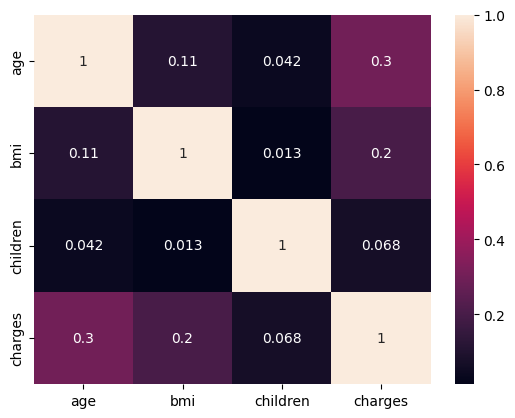

In [ ]:
corr=data.corr()
sns.heatmap(corr,annot=True)

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data feature Engineering

In [ ]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()



In [ ]:
data["sex"] = le.fit_transform (data["sex"])
data["smoker"] = le.fit_transform (data["smoker"])


Data after label Encoding

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


Feature Engineering: dependents and independent data

In [ ]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [ ]:
#  One Hot Encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))


In [ ]:
X

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [ ]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

Data spliting:Training(80%) and testing(20%)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [ ]:
X_train,y_train

(array([[0.0, 1.0, 0.0, ..., 19.95, 2, 0],
        [1.0, 0.0, 0.0, ..., 24.32, 0, 0],
        [0.0, 0.0, 1.0, ..., 24.86, 0, 0],
        ...,
        [1.0, 0.0, 0.0, ..., 25.175, 0, 0],
        [0.0, 0.0, 0.0, ..., 47.6, 2, 1],
        [0.0, 0.0, 0.0, ..., 29.9, 0, 0]], dtype=object),
 array([ 9193.8385 ,  8534.6718 , 27117.99378, ..., 11931.12525,
        46113.511  , 10214.636  ]))

In [ ]:
X_train.shape,y_train.shape

((1070, 9), (1070,))

 Model Development

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr=LinearRegression()


Training model

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

Prediction model


In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
y_pred

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

Metrics Evaluation

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
r2_score(y_test,y_pred)

0.7835929767120722

In [ ]:
mean_squared_error(y_test,y_pred)

33596915.851361476

In [ ]:
mean_absolute_error(y_test,y_pred)

4181.194473753654

In [ ]:
rmse=np.sqrt(33635210.431178406)
rmse

5799.587091438356

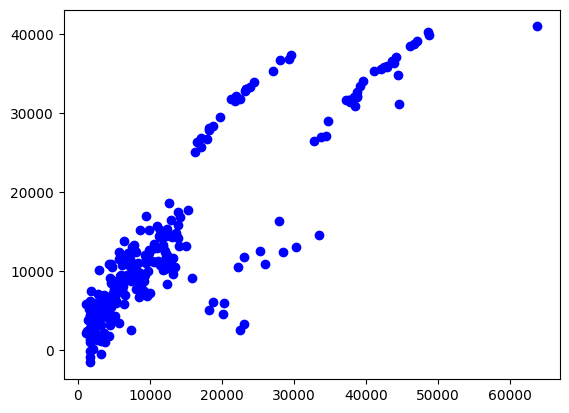

In [ ]:
plt.scatter(y_test,y_pred,color='blue')

**NOTE**: with R_ score near to 1, our model is accurate and  fit the use of linear regression machine learning to predict the insurance charge.

**2-polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features=PolynomialFeatures(degree=2)
X_polynomial=polynomial_features.fit_transform(X_train,y_train)


In [ ]:
X_polynomial

array([[1., 0., 1., ..., 4., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 4., 2., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [ ]:
linear_regression_1=LinearRegression()
linear_regression_1.fit(X_train,y_train)



LinearRegression()

In [ ]:
y_pred_1=linear_regression_1.predict(X_test)

In [ ]:
y_pred_1

array([ 8969.55027444,  7068.74744287, 36858.41091155,  9454.67850053,
       26973.17345656, 10864.11316424,   170.28084136, 16903.45028662,
        1092.43093614, 11218.34318352, 28101.68455267,  9377.73460205,
        5263.0595179 , 38416.04221107, 40255.82339284, 37098.25353123,
       15240.39392306, 35912.88264434,  9112.52398703, 31461.92108909,
        3847.68845883, 10130.12001517,  2370.54189389,  7140.21550828,
       11301.76782638, 12961.65366224, 14509.47251876,  6159.8976107 ,
        9963.85857263,  2177.85718217,  9115.93673493, 13073.68932159,
        4561.82376202,  3408.20756033,  4459.81359745, 13032.06505076,
        1979.99357292,  8813.28303302, 33271.29124448, 32585.51583927,
        3908.76090964,  4326.10774721, 14142.81326533, 11423.45494846,
        8774.13955311, 12097.28051001,  5281.57353499,  3150.5596042 ,
       35494.46461214,  9150.1124786 , 15836.84575621,  2343.57470069,
       12364.78414194,  1482.29488266, 13389.06105161, 12573.57395972,
      

M

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
r2_score=r2_score(y_test,y_pred_1)

In [ ]:
r2_score

0.7835929767120722

In [ ]:
mean_squared_error(y_test,y_pred_1)

33596915.851361476

In [ ]:
mean_absolute_error(y_test,y_pred_1)

4181.194473753654

In [ ]:
rmse=np.sqrt(33635210.431178406)
rmse

5799.587091438356

**Note**: We can see that, by using the polynomial regression degree 2 with R_score near to one the model is accurate.We can predict the insurance charge using also the polynomial regression  machine learning.

3**-Decision Tree regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

**Prediction Decision Tree**

In [ ]:
y_pred_2=dtr.predict(X_test)
y_pred_2

array([ 9225.2564 ,  5266.3656 , 28950.4692 ,  9225.2564 , 33732.6867 ,
       11326.71487,  2527.81865, 14410.9321 ,  3206.49135, 10702.6424 ,
       19361.9988 ,  6710.1919 ,  4151.0287 , 46200.9851 , 48173.361  ,
       48885.13561, 10118.424  , 42760.5022 ,  8515.7587 , 21348.706  ,
        5615.369  ,  8520.026  ,  1253.936  ,  2741.948  , 10702.6424 ,
       11512.405  , 13228.84695,  4618.0799 ,  9225.2564 , 16586.49771,
        7954.517  , 11840.77505, 11482.63485,  5425.02335,  3490.5491 ,
        8342.90875,  2007.945  ,  6849.026  , 24869.8368 , 37742.5757 ,
        4830.63   ,  2639.0429 , 10713.644  , 12523.6048 ,  5375.038  ,
       12913.9924 , 26018.95052,  5615.369  , 40273.6455 ,  4949.7587 ,
       13887.9685 ,  1720.3537 ,  6393.60345,  1708.0014 , 20781.48892,
        9964.06   ,  3268.84665, 58571.07448, 10704.47   , 11512.405  ,
       13393.756  ,  4949.7587 , 15170.069  ,  7201.70085, 10797.3362 ,
        4337.7352 , 16232.847  , 13047.33235,  2842.76075,  1526

Metrics evaluation

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [ ]:
r2_score=r2_score(y_test,y_pred_2)
r2_score

0.695630323892461

In [ ]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

**Note**: We can see that, by using Decision Tree with R_score near to one, the model is still accurate.We can predict the insurance charge using also the polynomial regression machine learning.

**4-Support Vector Regression**

In [ ]:
X

array([[0.0, 0.0, 0.0, ..., 27.9, 0, 1],
       [0.0, 0.0, 1.0, ..., 33.77, 1, 0],
       [0.0, 0.0, 1.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 0.0, 1.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 0.0, ..., 25.8, 0, 0],
       [0.0, 1.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [ ]:
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

In [ ]:
# Scalling y
y = y.reshape(len(y),1)
y

array([[16884.924 ],
       [ 1725.5523],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.3603]])

**Model development**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc_X=StandardScaler()


In [ ]:

X_scaled = sc_X.fit_transform(X)



In [ ]:
SC_y=StandardScaler()

In [ ]:
sc_y = StandardScaler()

In [ ]:
y_scaled = sc_y.fit_transform(y)

# Now we we apply the SVR

In [ ]:
from sklearn.svm import SVR


In [ ]:
svr_regressor = SVR(kernel='rbf')


In [ ]:
svr_regressor.fit(X_train,y_train)

SVR()

In [ ]:
y_pred = svr_regressor.predict(X_scaled)
y_pred

array([9468.46586535, 9466.21234904, 9465.5633821 , ..., 9465.3796205 ,
       9468.68240081, 9464.75657768])

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score = r2_score(y_scaled,y_pred)
r2_score

-89597387.85115762

**Note**: We can see that, by using Support Vector Regression  with R^2 <zero,the model is not accurate.We can not predict the insurance charge using the Support Vector Regression for the model in machine learning.